In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
features = pd.read_csv('Features data set.csv')
sales = pd.read_csv('sales data-set.csv') 
stores = pd.read_csv('stores data-set.csv')

In [4]:
features.sample(n=5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
7609,42,30/11/2012,64.13,3.719,333.89,NaN,NaN,13.86,938.84,131.427533,6.943,False
7607,42,16/11/2012,58.82,3.703,448.82,102.84,30.88,NaN,2273.80,131.325800,6.943,False
5820,32,05/07/2013,72.16,3.637,10421.20,2153.35,262.66,13506.87,1802.79,NaN,NaN,False
7172,40,08/07/2011,67.86,3.784,NaN,NaN,NaN,NaN,NaN,135.628333,4.584,False
4717,26,19/04/2013,40.55,3.678,1326.83,0.65,20.60,47.73,1101.15,139.122613,6.884,False


In [5]:
sales.sample(n=5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
204817,21,72,26/02/2010,55346.96,False
205375,21,81,19/11/2010,5823.47,False
187601,20,2,15/06/2012,79816.21,False
48365,5,95,30/04/2010,18889.51,False
337049,35,55,13/04/2012,9634.11,False


In [6]:
stores.sample(n=5)

,Store,Type,Size
14,15,B,123737
12,13,A,219622
21,22,B,119557
32,33,A,39690
7,8,A,155078


In [7]:
features = features.merge(stores, on = 'Store')
df = features.merge(sales, on = ['Store','Date','IsHoliday'])
df=df.fillna(0)

In [8]:
df.shape

(421570, 16)

In [9]:
df.sample(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
189837,20,08/10/2010,51.50,2.764,0.00,0.00,0.00,0.00,0.00,204.951982,7.484,False,A,203742,22,15675.20
420997,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,False,B,118221,35,1285.73
343218,36,27/05/2011,81.28,3.786,0.00,0.00,0.00,0.00,0.00,214.240846,8.300,False,A,39910,1,1680.75
328215,34,17/02/2012,37.25,3.493,8386.11,4644.97,16.48,2748.66,6015.47,130.454621,9.653,False,A,158114,95,71070.69
295517,31,30/07/2010,83.59,2.640,0.00,0.00,0.00,0.00,0.00,211.026468,8.099,False,A,203750,45,29.92


In [10]:
df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739,44.260317,15981.258123
std,12.785297,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328,30.492054,22711.183519
min,1.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000,1.000000,-4988.940000
25%,11.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000,18.000000,2079.650000
50%,22.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000,37.000000,7612.030000
75%,33.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000,74.000000,20205.852500
max,45.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,99.000000,693099.360000


In [11]:
df = df.sort_values(by='Date')

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [13]:
df = df.set_index('Date')

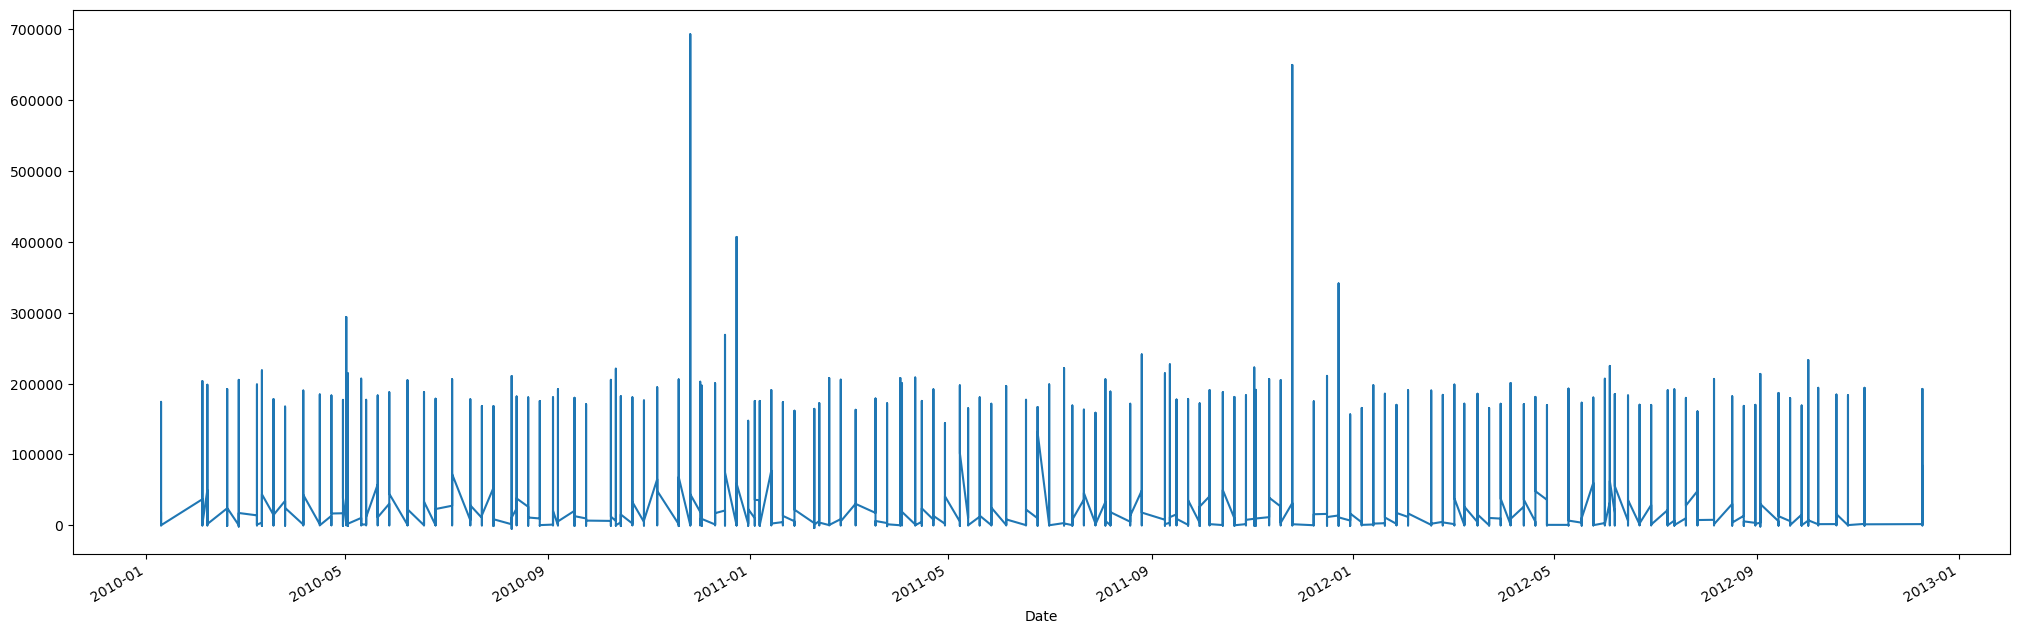

In [14]:
df['Weekly_Sales'].plot(figsize=(25,8));

In [15]:
df_Sales = df[['Weekly_Sales']]

In [16]:
df_Sales.head()

,Weekly_Sales
Date,
2011-01-04,9880.30
2011-01-04,51382.98
2011-01-04,11476.27
2011-01-04,87803.95
2011-01-04,33809.56


In [17]:
df_Sales = df_Sales.resample(rule='M').mean()

In [18]:
df_Sales.head()

,Weekly_Sales
Date,
2010-01-31,14391.780535
2010-02-28,16244.436211
2010-03-31,15828.833079
2010-04-30,15701.015586
2010-05-31,15971.989499


In [19]:
df_Sales = df_Sales.rename(columns={'Weekly_Sales':'Monthly_Sales'})

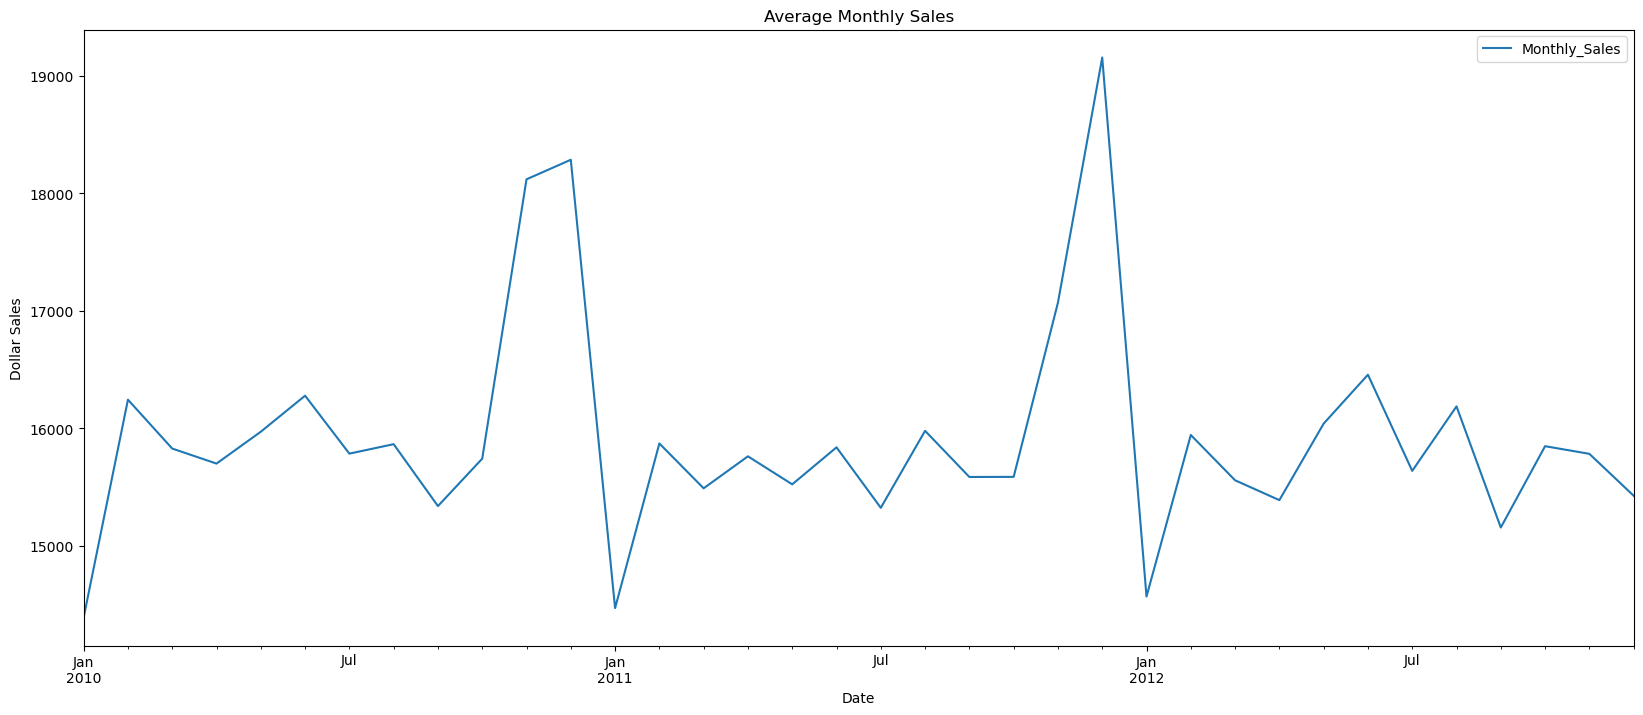

In [20]:
df_Sales.plot(figsize=(20,8))
plt.title('Average Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Dollar Sales');

In [21]:
df_Sales.isnull().sum()

Monthly_Sales    0
dtype: int64

In [22]:
df.to_csv('Retail Sales Monthly.csv',index=False)

In [23]:
df_Sales.shape

(36, 1)

In [24]:
sales_train = df_Sales.iloc[:22]
sales_test = df_Sales.iloc[21:]

In [25]:
sales_test

,Monthly_Sales
Date,
2011-10-31,15587.928852
2011-11-30,17069.858089
2011-12-31,19154.569311
2012-01-31,14570.279140
2012-02-29,15944.362413
2012-03-31,15558.979707
2012-04-30,15390.168452
2012-05-31,16040.929182
2012-06-30,16456.816992


In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(sales_train['Monthly_Sales'],
                                   trend = 'add',
                                   seasonal = 'add',
                                   seasonal_periods = 10).fit()

In [30]:
fitted_model = ExponentialSmoothing(sales_train['Monthly_Sales'],
                                   trend = 'add',
                                   seasonal = 'add',
                                   seasonal_periods = 10).fit()

C:\Users\aleen\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [31]:
test_predictions = fitted_model.forecast(24)

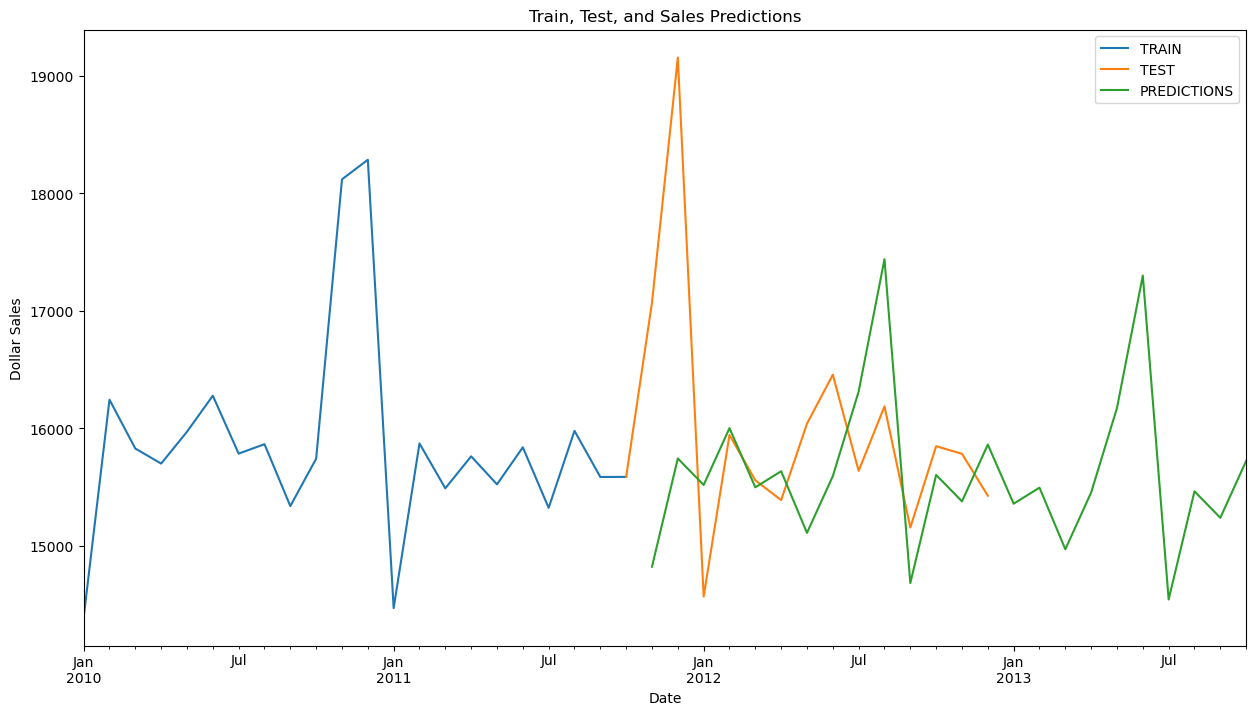

In [32]:
sales_train['Monthly_Sales'].plot(legend=True, label= 'TRAIN', figsize=(15,8))
sales_test['Monthly_Sales'].plot(legend=True, label= 'TEST', figsize=(15,8))
test_predictions.plot(legend=True, label= 'PREDICTIONS', figsize=(15,8))

plt.title('Train, Test, and Sales Predictions')
plt.xlabel("Date")
plt.ylabel("Dollar Sales");

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [34]:
sales_test.describe()

,Monthly_Sales
count,15.000000
mean,15987.886255
std,1047.454572
min,14570.279140
25%,15493.288223
50%,15784.015806
75%,16114.263140
max,19154.569311


In [35]:
test_predictions = fitted_model.forecast(15)

In [36]:
MSE = mean_squared_error(sales_test, test_predictions)

MAE = mean_absolute_error(sales_test, test_predictions)

RMSE = np.sqrt(mean_squared_error(sales_test, test_predictions))

pd.options.display.float_format = '{:.2f}'.format

results = pd.DataFrame({'Squared Error': ['MSE','MAE','RMSE','STD DVTN'],
                       'Score': [MSE,MAE,RMSE, '1047']})
results = results.set_index('Squared Error')
results


,Score
Squared Error,
MSE,1602875.88
MAE,860.96
RMSE,1266.05
STD DVTN,1047


In [37]:
import pickle

In [40]:
filename='ForeCast-HoltWinter.sav'
pickle.dump(fitted_model, open(filename,'wb'))

In [41]:
loadmodel = pickle.load(open('ForeCast-HoltWinter.sav', 'rb'))

In [42]:
test_predictions = fitted_model.forecast(24)

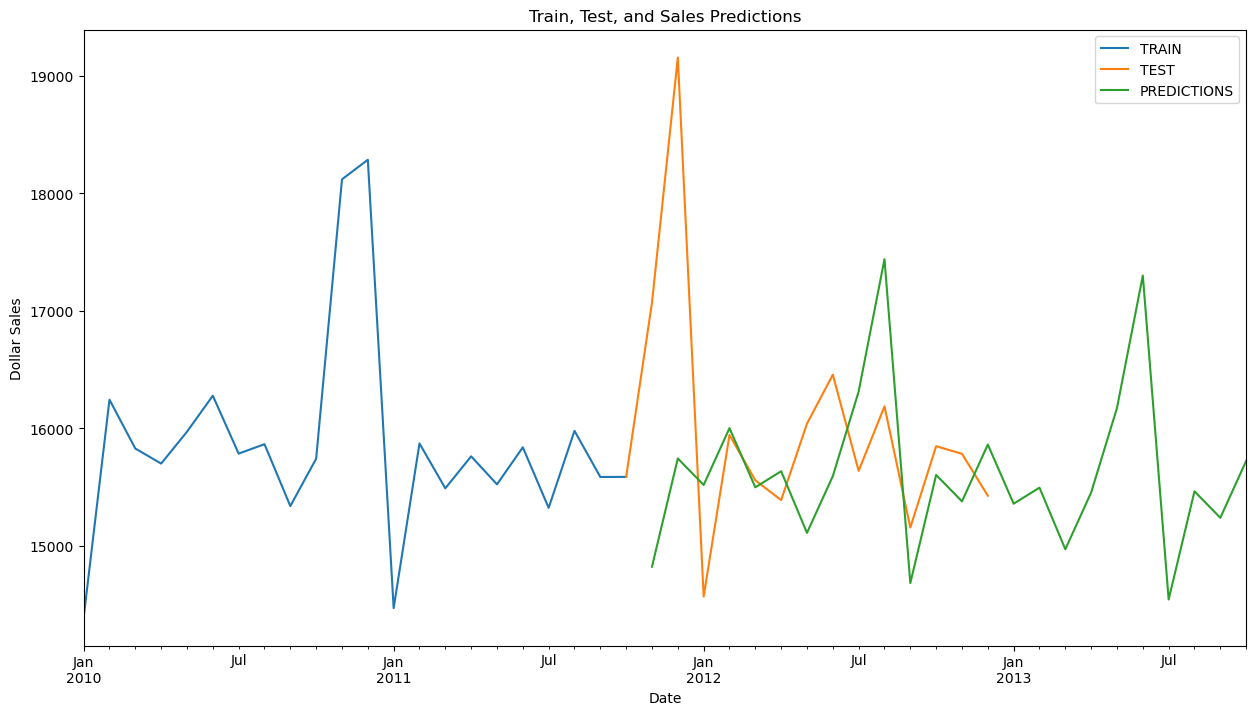

In [43]:
sales_train['Monthly_Sales'].plot(legend=True, label= 'TRAIN', figsize=(15,8))
sales_test['Monthly_Sales'].plot(legend=True, label= 'TEST', figsize=(15,8))
test_predictions.plot(legend=True, label= 'PREDICTIONS', figsize=(15,8))

plt.title('Train, Test, and Sales Predictions')
plt.xlabel("Date")
plt.ylabel("Dollar Sales");